### Import Libraries

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Load data

In [3]:
df = pd.read_csv("combined_ins_df.csv")

/var/folders/f2/cj5ryff162lbjrtj_zp2kn6m0000gn/T/ipykernel_41675/1196985651.py:1: DtypeWarning: Columns (3,4,7,8,9,10,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_ins_df.csv")


In [4]:
# select music festivals after 2020

df1 = df[
    (df['Year'] >= 2020) &
    (df['Headliner'].str.contains('"', na=False)) &
    (~df['Support'].isna())
  ]

In [7]:
df1.columns

Index(['Unnamed: 0', 'Event Date', 'Headliner', 'sp artist_name',
       'sp artist_genre', 'sp followers', 'sp popularity', 'yt name',
       'yt Channel ID', 'yt Title', 'yt Description', 'yt Published At',
       'yt View Count', 'yt Subscriber Count', 'yt Video Count',
       'Total population', 'Under 5 years population',
       '5 to 9 years population', '10 to 14 years population',
       '15 to 19 years population', '20 to 24 years population',
       '25 to 34 years population', '35 to 44 years population',
       '45 to 54 years population', '55 to 59 years population',
       '60 to 64 years population', '65 to 74 years population',
       '75 to 84 years population', '85 years and over population',
       'Median age', 'Year', 'headliner_monthly_listeners',
       'Support_Total_Monthly_Listeners', 'monthly_listeners',
       'Number of Shows', 'Support', 'Venue', 'City', 'State', 'Country',
       'Market', 'Company Type', 'Currency', 'Promoter', 'Genre',
       'Avg. Tick

In [9]:
df1.dtypes

Unnamed: 0                           int64
Event Date                          object
Headliner                           object
sp artist_name                      object
sp artist_genre                     object
sp followers                       float64
sp popularity                      float64
yt name                             object
yt Channel ID                       object
yt Title                            object
yt Description                      object
yt Published At                     object
yt View Count                      float64
yt Subscriber Count                float64
yt Video Count                     float64
Total population                   float64
Under 5 years population           float64
5 to 9 years population            float64
10 to 14 years population          float64
15 to 19 years population          float64
20 to 24 years population          float64
25 to 34 years population          float64
35 to 44 years population          float64
45 to 54 ye

In [11]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

/var/folders/f2/cj5ryff162lbjrtj_zp2kn6m0000gn/T/ipykernel_41675/2701115610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Unnamed: 0', axis=1, inplace=True)


In [13]:
missing_zero = pd.DataFrame({
    'NA%': (df1.isna().sum() / len(df) * 100).round(2),
    '0%': (df1.eq(0).sum() / len(df) * 100).round(2)
})

In [14]:
missing_zero

,NA%,0%
Event Date,0.00,0.00
Headliner,0.00,0.00
sp artist_name,0.36,0.00
sp artist_genre,0.36,0.00
sp followers,0.36,0.00
sp popularity,0.36,0.00
yt name,0.36,0.00
yt Channel ID,0.36,0.00
yt Title,0.36,0.00
yt Description,0.36,0.00


In [15]:
df = df1.copy()

### Feature Engineer

In [16]:
# Convert Event Date to datetime if not already
df['Event Date'] = pd.to_datetime(df['Event Date'])

# Time-based features
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['is_holiday_season'] = df['Month'].isin([11, 12]).astype(int)  # November and December
df['season'] = pd.cut(df['Month'], 
                     bins=[0, 3, 6, 9, 12], 
                     labels=['Winter', 'Spring', 'Summer', 'Fall'])
    

In [18]:
# Popularity and following ratios
df['follower_to_popularity_ratio'] = df['sp followers'] / (df['sp popularity'] + 1)
df['yt_engagement_ratio'] = df['yt View Count'] / (df['yt Subscriber Count'] + 1)
df['social_media_reach'] = df['sp followers'] + df['yt Subscriber Count'] + df['ins_total_followers']

# Monthly listeners features
df['headliner_to_support_ratio'] = df['headliner_monthly_listeners'] / (df['Support_Total_Monthly_Listeners'] + 1)
df['avg_monthly_listeners_per_show'] = df['monthly_listeners'] / (df['Number of Shows'] + 1)

In [19]:
# Age group ratios
df['young_audience_ratio'] = (df['15 to 19 years population'] + df['20 to 24 years population']) / df['Total population']
df['adult_audience_ratio'] = (df['25 to 34 years population'] + df['35 to 44 years population']) / df['Total population']

# Market potential indicators
df['market_size_score'] = (df['Total population'] * df['Median age']) / 1000000

In [21]:
# Pricing features
df['price_range'] = df['Ticket Price Max USD'] - df['Ticket Price Min USD']
df['price_variance'] = df['price_range'] / df['Ticket Price Avg. USD']

In [30]:
# Convert percentage strings to numeric values
df['Avg. Capacity Sold'] = df['Avg. Capacity Sold'].str.extract('(\d+)').astype(float) / 100

In [31]:
# Capacity features
df['capacity_utilization'] = df['Avg. Capacity Sold'] * df['Avg. Event Capacity']
df['expected_revenue'] = df['Avg. Tickets Sold'] * df['Ticket Price Avg. USD']

In [24]:
le = LabelEncoder()

categorical_columns = ['Genre', 'Venue', 'City', 'State', 'Market', 
                      'Company Type', 'Promoter', 'sp artist_genre']

for col in categorical_columns:
    if col in df.columns:
        df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))

In [32]:
# Popularity-based interactions
df['popularity_reach'] = df['sp popularity'] * np.log1p(df['social_media_reach'])

# Price-capacity interactions
df['price_capacity_ratio'] = df['Ticket Price Avg. USD'] * df['capacity_utilization']

# Market-demographic interactions
df['market_youth_score'] = df['market_size_score'] * df['young_audience_ratio']

In [35]:
# Convert numeric columns
numeric_columns = ['sp followers', 'sp popularity', 'yt View Count', 
                  'yt Subscriber Count', 'yt Video Count', 'headliner_monthly_listeners',
                  'Support_Total_Monthly_Listeners', 'monthly_listeners',
                  'Avg. Tickets Sold', 'Avg. Event Capacity', 'Ticket Price Avg. USD']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [38]:
missing_zero = pd.DataFrame({
    'NA%': (df.isna().sum() / len(df) * 100).round(2),
    '0%': (df.eq(0).sum() / len(df) * 100).round(2)
})

In [39]:
missing_zero

,NA%,0%
Event Date,0.00,0.00
Headliner,0.00,0.00
sp artist_name,96.47,0.00
sp artist_genre,96.47,0.00
sp followers,96.47,0.08
...,...,...
popularity_reach,96.74,0.04
capacity_utilization,0.00,0.00
expected_revenue,0.00,0.00
price_capacity_ratio,0.00,0.00


In [40]:
df.columns

Index(['Event Date', 'Headliner', 'sp artist_name', 'sp artist_genre',
       'sp followers', 'sp popularity', 'yt name', 'yt Channel ID', 'yt Title',
       'yt Description', 'yt Published At', 'yt View Count',
       'yt Subscriber Count', 'yt Video Count', 'Total population',
       'Under 5 years population', '5 to 9 years population',
       '10 to 14 years population', '15 to 19 years population',
       '20 to 24 years population', '25 to 34 years population',
       '35 to 44 years population', '45 to 54 years population',
       '55 to 59 years population', '60 to 64 years population',
       '65 to 74 years population', '75 to 84 years population',
       '85 years and over population', 'Median age', 'Year',
       'headliner_monthly_listeners', 'Support_Total_Monthly_Listeners',
       'monthly_listeners', 'Number of Shows', 'Support', 'Venue', 'City',
       'State', 'Country', 'Market', 'Company Type', 'Currency', 'Promoter',
       'Genre', 'Avg. Tickets Sold', 'Avg. Gros

In [45]:
# Convert object columns to numeric where possible
for col in df.select_dtypes(['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        continue

# Drop non-numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Remove any columns with all NaN
df_numeric = df_numeric.dropna(axis=1, how='all')

# Now run feature selection
correlations = df_numeric.corr()['Avg. Gross USD'].abs().sort_values(ascending=False)

print("Top correlated features:")
print(correlations.head(10))

Top correlated features:
Avg. Gross USD           1.000000
expected_revenue         1.000000
price_capacity_ratio     0.999994
capacity_utilization     0.711342
Avg. Tickets Sold        0.710914
Ticket Price Avg. USD    0.705194
Ticket Price Max USD     0.688583
price_range              0.652817
Avg. Event Capacity      0.649365
social_media_reach       0.397770
Name: Avg. Gross USD, dtype: float64


In [ ]:
X = df.drop(target_column, axis=1)
y = df[target_column]

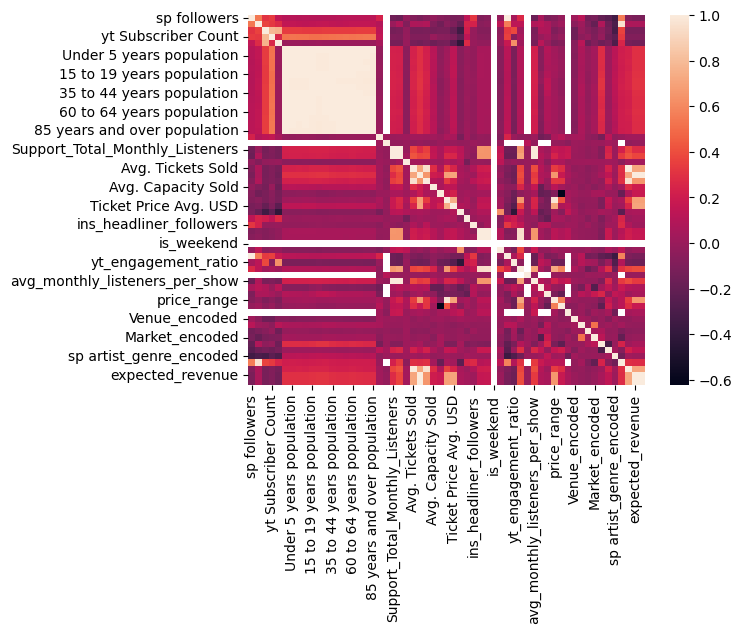

In [43]:
dataplot = sns.heatmap(df.corr(numeric_only=True))

# Displaying heatmap
plt.show()

In [57]:
def prepare_data_for_modeling(df, target_column='Avg. Gross USD'):
    df = df.copy()
    
    # Create engineered features
    df['price_range'] = df['Ticket Price Max USD'] - df['Ticket Price Min USD']
    df['expected_max_revenue'] = df['Avg. Event Capacity'] * df['Ticket Price Max USD']
    df['expected_min_revenue'] = df['Avg. Event Capacity'] * df['Ticket Price Min USD']
    df['follower_engagement'] = df['sp followers'] / (df['monthly_listeners'] + 1)
    df['youtube_engagement'] = df['yt View Count'] / (df['yt Subscriber Count'] + 1)
    
    numeric_columns = [
        'Avg. Event Capacity', 'Ticket Price Min USD', 'Ticket Price Max USD',
        'Number of Shows', 'monthly_listeners', 'sp followers', 'yt Subscriber Count',
        'Total population', 'capacity_utilization', 'sp popularity', 'yt View Count',
        'headliner_monthly_listeners', 'Support_Total_Monthly_Listeners',
        'Avg. Tickets Sold', 'Ticket Price Avg. USD', 'price_range',
        'expected_max_revenue', 'expected_min_revenue', 'follower_engagement',
        'youtube_engagement'
    ]
    
    # Convert and clean numeric columns
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Handle missing values
    numeric_df = df[numeric_columns].copy()
    numeric_df = numeric_df.fillna(numeric_df.median())
    
    # Add encoded categorical columns
    categorical_columns = ['Market_encoded', 'City_encoded', 'Genre_encoded']
    for col in categorical_columns:
        if col in df.columns:
            numeric_df[col] = df[col]
    
    # Separate features and target
    X = numeric_df.drop(target_column, axis=1) if target_column in numeric_df.columns else numeric_df
    y = df[target_column]
    
    return X, y

def train_and_evaluate_models(X, y):
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Initialize models
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=200,
            max_depth=20,
            min_samples_split=5,
            random_state=42
        ),
        'XGBoost': xgb.XGBRegressor(
            n_estimators=200,
            max_depth=7,
            learning_rate=0.1,
            subsample=0.8,
            random_state=42
        )
    }
    
    # Set up cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    results = []
    feature_importance = {}
    model_scores = {}  # Store numerical scores
    
    for name, model in models.items():
        # Calculate scores
        rmse_scores = cross_val_score(model, X_scaled, y, 
                                    scoring=make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 
                                    cv=cv)
        mae_scores = cross_val_score(model, X_scaled, y, scoring=make_scorer(mean_absolute_error), cv=cv)
        r2_scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=cv)
        
        # Store numerical scores
        model_scores[name] = {
            'r2_mean': r2_scores.mean(),
            'rmse_mean': rmse_scores.mean(),
            'mae_mean': mae_scores.mean()
        }
        
        # Store formatted results
        results.append({
            'Model': name,
            'RMSE': f"{rmse_scores.mean():,.2f} (+/- {rmse_scores.std() * 2:,.2f})",
            'MAE': f"{mae_scores.mean():,.2f} (+/- {mae_scores.std() * 2:,.2f})",
            'R2 Score': f"{r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})"
        })
        
        # Get feature importance
        model.fit(X_scaled, y)
        if hasattr(model, 'feature_importances_'):
            importance = pd.DataFrame({
                'feature': X.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            feature_importance[name] = importance
    
    return pd.DataFrame(results), feature_importance, model_scores

def optimize_best_model(X, y, best_model_name):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [5, 6, 7, 8],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 0.9, 1.0],
        'min_child_weight': [1, 3, 5]
    }
    
    model = xgb.XGBRegressor(random_state=42)
    
    # Use 5-fold cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    grid_search = GridSearchCV(
        model, 
        param_grid, 
        cv=cv, 
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_scaled, y)
    
    return grid_search.best_estimator_, grid_search.best_params_

# Main analysis function
def run_full_analysis(df, target_column='Avg. Gross USD'):
    print("Preparing data...")
    X, y = prepare_data_for_modeling(df, target_column)
    
    print("\nTraining and evaluating models...")
    results, feature_importance, model_scores = train_and_evaluate_models(X, y)
    print("\nModel Performance Comparison:")
    print(results)
    
    # Find best model using numerical scores
    best_model_name = max(model_scores.items(), key=lambda x: x[1]['r2_mean'])[0]
    print(f"\nBest performing model: {best_model_name}")
    
    print("\nTop 10 most important features:")
    if best_model_name in feature_importance:
        print(feature_importance[best_model_name].head(10))
    
    print("\nOptimizing best model...")
    best_model, best_params = optimize_best_model(X, y, best_model_name)
    
    return results, feature_importance, best_model, best_params

# Use the function
results, feature_importance, best_model, best_params = run_full_analysis(df)

Preparing data...

Training and evaluating models...

Model Performance Comparison:
           Model                         RMSE                        MAE  \
0  Random Forest  405,746.01 (+/- 303,644.89)  55,154.12 (+/- 36,050.26)   
1        XGBoost  305,867.37 (+/- 238,306.27)  44,028.09 (+/- 23,587.79)   

              R2 Score  
0  0.8822 (+/- 0.1008)  
1  0.9165 (+/- 0.1795)  

Best performing model: XGBoost

Top 10 most important features:
                  feature  importance
17   expected_min_revenue    0.529823
16   expected_max_revenue    0.210863
14  Ticket Price Avg. USD    0.090464
8    capacity_utilization    0.073124
2    Ticket Price Max USD    0.018365
0     Avg. Event Capacity    0.017908
1    Ticket Price Min USD    0.015511
13      Avg. Tickets Sold    0.015399
22          Genre_encoded    0.014522
20         Market_encoded    0.005760

Optimizing best model...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [58]:
# Print all features used in X
print("Available Features:")
print(X.columns.tolist())

# Print feature importance for both models
print("\nFeature Importance in Random Forest:")
print(feature_importance['Random Forest'])

print("\nFeature Importance in XGBoost:")
print(feature_importance['XGBoost'])

Available Features:
['Avg. Event Capacity', 'Ticket Price Min USD', 'Ticket Price Max USD', 'Number of Shows', 'monthly_listeners', 'sp followers', 'yt Subscriber Count', 'Total population', 'capacity_utilization', 'Market_encoded', 'City_encoded']

Feature Importance in Random Forest:
                            feature    importance
17             expected_min_revenue  3.300637e-01
16             expected_max_revenue  2.000999e-01
14            Ticket Price Avg. USD  1.809072e-01
8              capacity_utilization  1.302781e-01
13                Avg. Tickets Sold  6.636112e-02
1              Ticket Price Min USD  2.684087e-02
2              Ticket Price Max USD  2.124007e-02
15                      price_range  2.117991e-02
0               Avg. Event Capacity  1.096200e-02
20                   Market_encoded  3.700060e-03
22                    Genre_encoded  2.097927e-03
12  Support_Total_Monthly_Listeners  1.791044e-03
3                   Number of Shows  1.686662e-03
21           

In [49]:
# Select features
features = [
    'Avg. Event Capacity',
    'Ticket Price Min USD',
    'Ticket Price Max USD',
    'Number of Shows',
    'monthly_listeners',
    'sp followers',
    'yt Subscriber Count',
    'Total population',
    'capacity_utilization',
    'Market_encoded',
    'City_encoded'
]

X = df[features]
y = df['Avg. Gross USD']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create custom scorers
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)))
mae_scorer = make_scorer(mean_absolute_error)

# Initialize models
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

# Evaluate models using cross-validation
models = {
    'Random Forest': rf,
    'XGBoost': xgb_model
}

for name, model in models.items():
    # Calculate scores
    rmse_scores = cross_val_score(model, X_imputed, y, scoring=rmse_scorer, cv=cv)
    mae_scores = cross_val_score(model, X_imputed, y, scoring=mae_scorer, cv=cv)
    r2_scores = cross_val_score(model, X_imputed, y, scoring='r2', cv=cv)
    
    print(f"\n{name} Results:")
    print(f"RMSE: {rmse_scores.mean():,.2f} (+/- {rmse_scores.std() * 2:,.2f})")
    print(f"MAE: {mae_scores.mean():,.2f} (+/- {mae_scores.std() * 2:,.2f})")
    print(f"R2: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")

# Train final model on all data to get feature importance
final_model = rf  # or xgb_model, depending on which performed better
final_model.fit(X_imputed, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': final_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Random Forest Results:
RMSE: 556,018.64 (+/- 127,792.40)
MAE: 106,602.46 (+/- 27,368.90)
R2: 0.7818 (+/- 0.1648)

XGBoost Results:
RMSE: 456,299.86 (+/- 169,598.25)
MAE: 98,695.90 (+/- 23,947.41)
R2: 0.8544 (+/- 0.0991)

Feature Importance:
                 feature  importance
8   capacity_utilization    0.453528
2   Ticket Price Max USD    0.263540
1   Ticket Price Min USD    0.226203
0    Avg. Event Capacity    0.020331
4      monthly_listeners    0.013050
10          City_encoded    0.012461
9         Market_encoded    0.007655
3        Number of Shows    0.002751
6    yt Subscriber Count    0.000224
7       Total population    0.000177
5           sp followers    0.000080
